# Applied Machine Learning Assignment 1			         
## MUKIL RAJ KANNAN(mxk180040)

Dataset description and summary statistics:
The dataset for implementing the gradient descent algorithm for linear and logistic regression is downloaded from UCI Machine Learning repository. The dataset name is “sgemm_product.csv” . The details about the dataset is mentioned below :-  
    The dataset has 241600 records with 18 features  
    The dependent variable is average of four runs (in ms)  
    This is a clean dataset as there are no missing values in the dataset in any of the columns  


In [4]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#read the csv file
sgemm_product=pd.read_csv('sgemm_product.csv')

In [6]:
sgemm_product.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [7]:
sgemm_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [8]:
sgemm_product.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


In [9]:
# take the average of run time
sgemm_product['AVERAGE_RUN']=sgemm_product[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)

In [10]:
sgemm_product.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),AVERAGE_RUN
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [11]:
# drop the run columns as we need only the average column for our model
sgemm_product=sgemm_product.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)

In [12]:
# To get the datatypes
sgemm_product.dtypes

MWG              int64
NWG              int64
KWG              int64
MDIMC            int64
NDIMC            int64
MDIMA            int64
NDIMB            int64
KWI              int64
VWM              int64
VWN              int64
STRM             int64
STRN             int64
SA               int64
SB               int64
AVERAGE_RUN    float64
dtype: object

In [13]:
# Code to find if there is any missing values
sgemm_product.isnull().sum()

MWG            0
NWG            0
KWG            0
MDIMC          0
NDIMC          0
MDIMA          0
NDIMB          0
KWI            0
VWM            0
VWN            0
STRM           0
STRN           0
SA             0
SB             0
AVERAGE_RUN    0
dtype: int64

Correlation is a term that quantifies the degree to which two variables are related to each other . We can try to find the correlation between the independent variables by using the correlation plot. When variables are highly correlated, they can introduce instability in the errors on the betas and are, in fact, measuring the same thing . So, the simple solution, assuming you cannot greatly increase sample size, is to throw out all but one of any group of variables that is highly correlated. Since our data doesn’t have any highly correlated data, we can use all 15 variables.

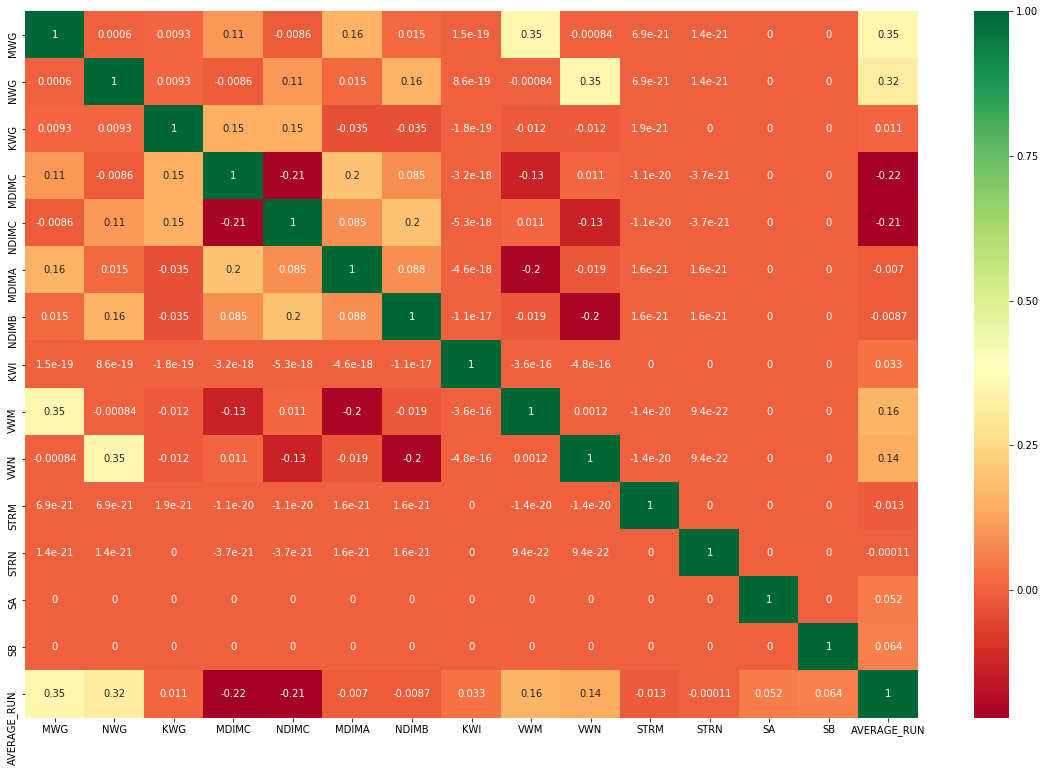

In [14]:
# Get correlations of each features in dataset
corrmat = sgemm_product.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,13))
sns.heatmap(sgemm_product[top_corr_features].corr(),annot=True,cmap="RdYlGn")



# 1. Hyperparameter Tuning

First , we scaled the data using the StandardScaler() built in function. We scaled all the 16 columns . Secondly , we split the dataset (with 16 columns) into training and test for a ratio of 0.7 : 0.3 . Then we create the X_train, X_test, y_train and y_test data for our training and test set.

In [15]:
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
lin_reg1 = sc_data.fit_transform(sgemm_product)
lin_reg1 = pd.DataFrame(lin_reg1)
lin_reg1.columns = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI','VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB','AVERAGE_RUN']
y_LinReg=lin_reg1['AVERAGE_RUN']
X_LinReg=lin_reg1.drop(['AVERAGE_RUN'],axis=1)

C:\Users\mukil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mukil\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
#setting the matrixes
ones = np.ones([X_LinReg.shape[0],1])
X_LinReg = np.concatenate((ones,X_LinReg),axis=1)


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_LinReg, y_LinReg, test_size=0.3, random_state=101)

In [42]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        h = X.dot(B) # Hypothesis Values
        loss = h - Y #Difference b/w Hypothesis and Actual Y
        gradient = X.T.dot(loss) / m # Gradient Calculation
        B = B - alpha * gradient # Changing Values of B using Gradient
        cost = cost_function(X, Y, B) # New Cost Value
        cost_history[iteration] = cost
    return B, cost_history


In [93]:
# Initial Coefficients
B = np.zeros(X_train.shape[1])

In [94]:
# compute cost with all Betas as zeroes
cost_before_GD = cost_function(X_train,y_train,B)
print(cost_before_GD)

0.49465903977303277


In [95]:
#set hyper parameters
learning_rate =[0.0001,0.0003,0.0005,0.01] #learning rate
iters = 5000 #no.of iterations
#threshold = [0.00001,0.000015,0.00002,0.000025]
finalCost_train = []
finalCost_test = []
for alpha in learning_rate:
    newB,cost_history = batch_gradient_descent(X_train,y_train,B,alpha,iters)
    finalCost_train.append(cost_history[-1]) 
    finalCost_test.append(cost_function(X_test,y_test,newB)) 
    

In [96]:
print(newB)


[-0.00170219  0.38324228  0.352695    0.10986753 -0.3545628  -0.34690952
  0.02541489  0.02614807  0.03191307 -0.0087549  -0.01734381 -0.01379628
  0.00180739  0.0511905   0.06308263]


In [97]:
print(finalCost_test)
print(finalCost_train)

[0.39458945973127135, 0.3282748235366828, 0.3117796644762351, 0.30333104511190984]
[0.3799613940434122, 0.3163247470808388, 0.30079538537442135, 0.29325342660501585]


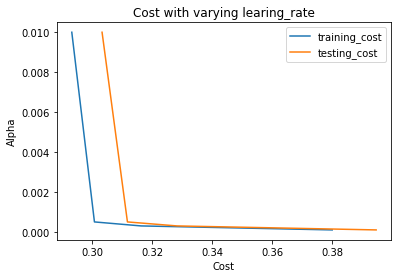

In [99]:
plt.plot(finalCost_train, learning_rate, label='training_cost')
plt.plot(finalCost_test, learning_rate, label='testing_cost')
plt.title('Cost with varying learing_rate')
plt.ylabel('Alpha',)
plt.xlabel('Cost')
plt.legend()
plt.show()


In [100]:
from sklearn.linear_model import LinearRegression
model_lin=LinearRegression()
model_lin.fit(X_train,y_train)
predictions=model_lin.predict(X_test)

In [101]:
model_lin.coef_

array([ 0.        ,  0.38324228,  0.352695  ,  0.10986753, -0.3545628 ,
       -0.34690952,  0.02541489,  0.02614807,  0.03191307, -0.0087549 ,
       -0.01734381, -0.01379628,  0.00180739,  0.0511905 ,  0.06308263])

In [102]:
model_lin.intercept_

-0.0017021873743116227

Logistic Regression Experiment A

False    120801
True     120799
Name: AVERAGE_RUN, dtype: int64


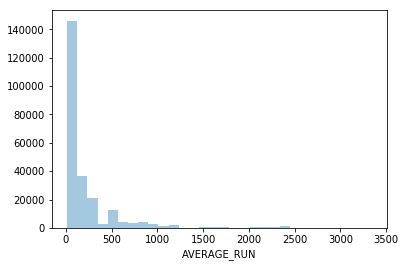

In [47]:
sns.distplot(sgemm_product['AVERAGE_RUN'],bins=30,kde=False)
average_median=sgemm_product['AVERAGE_RUN'].median()

classificaion=sgemm_product['AVERAGE_RUN']>sgemm_product['AVERAGE_RUN'].median()
values=classificaion.value_counts()
print(values)

In [48]:
# convert into binary classification problem. The target variable should have two categories.
y_LogReg1=sgemm_product['AVERAGE_RUN']
X_LogReg1=sgemm_product.drop(['AVERAGE_RUN'],axis=1)
y_LogReg1 = y_LogReg1.apply(lambda x : 0 if x <= average_median else 1)
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_LogReg1 = StandardScaler()
X_LogReg1 = sc_LogReg1.fit_transform(X_LogReg1)
X_LogReg1 = pd.DataFrame(X_LogReg1)

#setting the matrixes
ones = np.ones([X_LogReg1.shape[0],1])
X_LogReg1 = np.concatenate((ones,X_LogReg1),axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_LogReg1,y_LogReg1,test_size = 0.3,random_state = 0)



C:\Users\mukil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mukil\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost


def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        theta = theta - (learning_rate/m) * (X.T @ (sigmoid(X @ theta) - y)) 
        cost = compute_cost(X, y, theta)
        cost_history[i] = cost
    return (cost_history, theta)

def pred_values(beta, X):
    '''
    function to predict labels
    '''
    pred_prob = sigmoid(X.dot(beta))
    pred_value = np.where(pred_prob >= .5, 1, 0)
    return np.squeeze(pred_value)

In [117]:
theta = np.zeros(X_train.shape[1])
initial_cost = compute_cost(X_train, y_train, theta)
print("Initial Cost is: {} \n".format(initial_cost))

#set hyper parameters
learning_rate = [0.001,0.003,0.006,0.1] #learning rate
iters = 5000 #no.of iterations
#threshold = [0.00001,0.000015,0.00002,0.000025]

Initial Cost is: 0.693127180759928 



In [118]:
from sklearn.metrics import accuracy_score
LogCost_train = []
LogCost_test = []
accuracy1=[]
for alpha in learning_rate:
    (LogCost_history,newtheta) = gradient_descent(X_train, y_train, theta, alpha, iters)
    LogCost_train.append(LogCost_history[-1])
    LogCost_test.append(compute_cost(X_test,y_test,newtheta))
    y_pred = pred_values(newtheta, X_test)
    accuracy1.append(accuracy_score(y_test,y_pred))
    

In [119]:
# estimated beta values and number of iterations
print("Estimated regression coefficients:", newtheta)
#print("No. of iterations:", num_iter)

# predicted labels
y_pred = pred_values(newtheta, X_test)

Estimated regression coefficients: [ 0.00903904  1.3186386   0.84865837  0.15362319 -0.89816392 -0.76339183
 -0.05115526 -0.06745431 -0.01050558 -0.07767243 -0.14498027 -0.32463368
 -0.03295024 -0.4015677  -0.08649109]


In [120]:
print(LogCost_train)
print(LogCost_test)

[array([0.53098881]), array([0.48864706]), array([0.47918094]), array([0.47728631])]
[0.5314577455066056, 0.48854556691330436, 0.4786143635347578, 0.47636514333342944]


In [121]:
accuracy1

[0.7910182119205298, 0.8031594922737307, 0.807008830022075, 0.8081539735099338]

Text(0.5, 1.0, 'Accuracy vs. Test set Alpha')

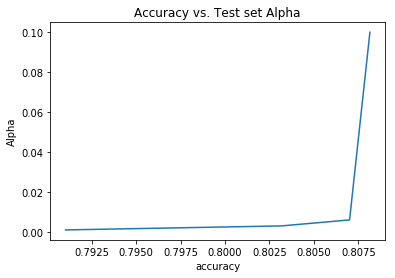

In [122]:
fig , ax = plt.subplots()
ax.plot(accuracy1,learning_rate)
ax.set_xlabel('accuracy')  
ax.set_ylabel('Alpha')  
ax.set_title('Accuracy vs. Test set Alpha') 

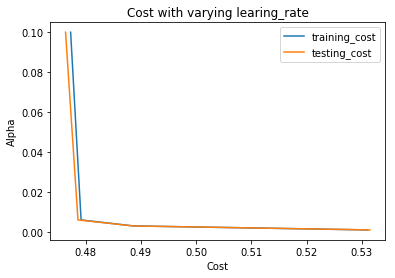

In [123]:
plt.plot(LogCost_train, learning_rate, label='training_cost')
plt.plot(LogCost_test, learning_rate, label='testing_cost')
plt.title('Cost with varying learing_rate')
plt.ylabel('Alpha',)
plt.xlabel('Cost')
plt.legend()
plt.show()

In [124]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(X_train,y_train)
predictions=model_log.predict(X_test)

C:\Users\mukil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [125]:
model_log.coef_

array([[ 0.00451476,  1.31846992,  0.84854204,  0.1535796 , -0.89801053,
        -0.76325589, -0.05113785, -0.06743863, -0.01050439, -0.07761699,
        -0.14491875, -0.32460372, -0.03294696, -0.40152923, -0.08648361]])

In [126]:
newtheta

array([ 0.00903904,  1.3186386 ,  0.84865837,  0.15362319, -0.89816392,
       -0.76339183, -0.05115526, -0.06745431, -0.01050558, -0.07767243,
       -0.14498027, -0.32463368, -0.03295024, -0.4015677 , -0.08649109])

In [127]:
model_log.intercept_

array([0.00451476])

# 2. Changing Convergence Method

Experiment 2

In [32]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

def batch_gradient_descent_threshold(X, Y, B,alpha,iters,threshold):
    cost = [0] * iters
    m = len(Y)

    for iteration in range(iters):
        h = X.dot(B) # Hypothesis Values
        loss = h - Y #Difference b/w Hypothesis and Actual Y
        gradient = X.T.dot(loss) / m # Gradient Calculation
        B = B - alpha * gradient # Changing Values of B using Gradient
        cost[iteration] = cost_function(X, Y, B) # New Cost Value
        if (cost[iteration-1] - cost[iteration] <= threshold and iteration != 0):
            print("Previous cost:",cost[iteration-1] ,
                  "Current cost:", cost[iteration],
                  "Difference :",cost[iteration-1] - cost[iteration],
                  "Iteration:",iteration,
                  "Threshold",threshold)
            print("Breaking out of loop")
            iteration_count.append(iteration)
            return B , cost[iteration],iteration_count
    return B, cost,iteration_count

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_LinReg, y_LinReg, test_size=0.3, random_state=101)

In [34]:

# Initial Coefficients
B = np.zeros(X_train.shape[1])

#set hyper parameters
iters = 60000
iteration_test=[]
iteration_train=[]
cost_train=[]
cost_test=[]

threshold = [0.01,0.000001,0.0000000000001,0.00000000000000000001]
alpha = 0.001

for thresh in threshold:
    iteration_count = []
    print("Cost for training set with threshold",thresh)
    g_threshold_train, cost_threshold_train, iteration_count = batch_gradient_descent_threshold(X_train, y_train, B, alpha,iters, thresh)
    iteration_train.append(iteration_count)
    cost_train.append(cost_threshold_train)
    iteration_count = []
    print("Cost for testing set with threshold",thresh)
    g_threshold_test, cost_threshold_test, iteration_count = batch_gradient_descent_threshold(X_test, y_test, B, alpha, iters,thresh)
    iteration_test.append(iteration_count)
    cost_test.append(cost_threshold_test)


Cost for training set with threshold 0.01
Previous cost: 0.49428689696085465 Current cost: 0.49391557865250874 Difference : 0.00037131830834591373 Iteration: 1 Threshold 0.01
Breaking out of loop
Cost for testing set with threshold 0.01
Previous cost: 0.5120722721678208 Current cost: 0.5116831735089092 Difference : 0.0003890986589115686 Iteration: 1 Threshold 0.01
Breaking out of loop
Cost for training set with threshold 1e-06
Previous cost: 0.2942023937458028 Current cost: 0.2942013942422925 Difference : 9.995035102905447e-07 Iteration: 4452 Threshold 1e-06
Breaking out of loop
Cost for testing set with threshold 1e-06
Previous cost: 0.3041477777935371 Current cost: 0.30414677855651123 Difference : 9.992370258449235e-07 Iteration: 4469 Threshold 1e-06
Breaking out of loop
Cost for training set with threshold 1e-13
Previous cost: 0.29325342670077376 Current cost: 0.2932534267006739 Difference : 9.986456106503283e-14 Iteration: 19821 Threshold 1e-13
Breaking out of loop
Cost for testing

In [35]:
print(cost_train)
print(cost_test)

[0.49391557865250874, 0.2942013942422925, 0.2932534267006739, 0.29325342660520104]
[0.5116831735089092, 0.30414677855651123, 0.3032013644576094, 0.30320136436267253]


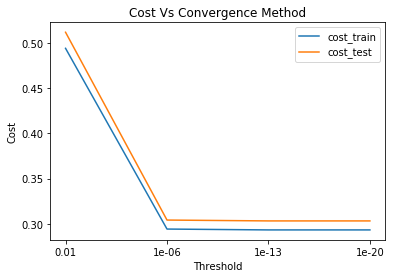

In [40]:
fig, ax = plt.subplots()
ax.plot(range(len(threshold)),cost_train,label='cost_train')
ax.plot(range(len(threshold)),cost_test,label='cost_test')
ax.set_xticks(range(len(threshold)))
ax.set_xticklabels(threshold)
ax.set_xlabel('Threshold')
ax.set_ylabel('Cost')
ax.set_title('Cost Vs Convergence Method')
ax.legend()

In [44]:
threshold=0.0000000000001
alpha = 0.001

iterations=[1,1000,2500,5000]

finalCost_train = []
finalCost_test = []

for iters in iterations:
    newB,cost_history = batch_gradient_descent(X_train,y_train,B,alpha,iters)
    finalCost_train.append(cost_history[-1]) 
    finalCost_test.append(cost_function(X_test,y_test,newB)) 

print(finalCost_train)
print(finalCost_test)

[0.49428689696085465, 0.33604290524301167, 0.3007925323292575, 0.29378627038800925]
[0.5120814198440159, 0.348965330506668, 0.31177651742288703, 0.3040661838500954]


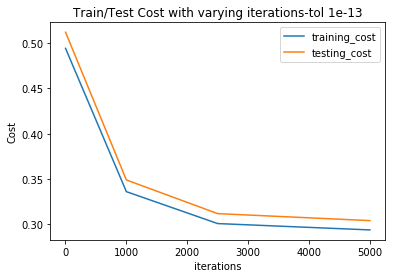

In [45]:
plt.plot(iterations, finalCost_train, label='training_cost')
plt.plot(iterations, finalCost_test, label='testing_cost')
plt.title('Train/Test Cost with varying iterations-tol 1e-13')
plt.ylabel('Cost',)
plt.xlabel('iterations')
plt.legend()
plt.show()


Experiment B Logistic

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X_LogReg1,y_LogReg1,test_size = 0.3,random_state = 0)

def gradient_descent_threshold_log(X, y, theta, learning_rate, iterations,threshold):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        theta = theta - (learning_rate/m) * (X.T @ (sigmoid(X @ theta) - y)) 
        cost_history[i] = compute_cost(X, y, theta)
        if (cost_history[i-1] - cost_history[i] <= threshold and i != 0):
            print("Previous cost:",cost_history[i-1] ,
                  "Current cost:", cost_history[i],
                  "Difference :",cost_history[i-1] - cost_history[i],
                  "Iteration:",i,
                  "Threshold",threshold)
            print("Breaking out of loop")
            iteration_count.append(i)
            return B , cost_history[i],iteration_count
    return B, cost_history, iteration_count


In [67]:
# Initial Coefficients
B = np.zeros(X_train.shape[1])

#set hyper parameters
iters = 60000
iteration_test=[]
iteration_train=[]
threshold = [0.01,0.000001,0.0000000000001,0.00000000000000000001]
alpha = 0.1
cost_train=[]
cost_test=[]

for thresh in threshold:
    iteration_count = []
    g_threshold_train, cost_threshold_train, iteration_count = gradient_descent_threshold_log(X_train, y_train, B, alpha,iters, thresh)
    iteration_train.append(iteration_count)
    cost_train.append(cost_threshold_train)
    iteration_count = []
    g_threshold_test, cost_threshold_test, iteration_count = gradient_descent_threshold_log(X_test, y_test, B, alpha, iters,thresh)
    iteration_test.append(iteration_count)
    cost_test.append(cost_threshold_test)


Previous cost: [0.68455546] Current cost: [0.67646351] Difference : [0.00809195] Iteration: 1 Threshold 0.01
Breaking out of loop
Previous cost: [0.68464126] Current cost: [0.67662531] Difference : [0.00801595] Iteration: 1 Threshold 0.01
Breaking out of loop
Previous cost: [0.47738465] Current cost: [0.47738366] Difference : [9.91334931e-07] Iteration: 580 Threshold 1e-06
Breaking out of loop
Previous cost: [0.47628376] Current cost: [0.47628276] Difference : [9.9851598e-07] Iteration: 589 Threshold 1e-06
Breaking out of loop
Previous cost: [0.47728631] Current cost: [0.47728631] Difference : [9.99755834e-14] Iteration: 2788 Threshold 1e-13
Breaking out of loop
Previous cost: [0.47618275] Current cost: [0.47618275] Difference : [9.98090499e-14] Iteration: 2851 Threshold 1e-13
Breaking out of loop
Previous cost: [0.47728631] Current cost: [0.47728631] Difference : [0.] Iteration: 4033 Threshold 1e-20
Breaking out of loop
Previous cost: [0.47618275] Current cost: [0.47618275] Difference

In [69]:
print(cost_train)
print(cost_test)

[array([0.67646351]), array([0.47738366]), array([0.47728631]), array([0.47728631])]
[array([0.67662531]), array([0.47628276]), array([0.47618275]), array([0.47618275])]


# 3. Random Feature Selection

Experiment 3

In [87]:
y_LinReg3=lin_reg1['AVERAGE_RUN']
X_LinReg3 = lin_reg1.drop(['AVERAGE_RUN'],axis=1)

X_LinReg3_sample=pd.DataFrame.sample(X_LinReg3,n=8,random_state=0,axis=1)
X_LinReg3_sample.columns

#setting the matrixes
ones = np.ones([X_LinReg3_sample.shape[0],1])
X_LinReg3_sample = np.concatenate((ones,X_LinReg3_sample),axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_LinReg3_sample, y_LinReg3, test_size=0.3, random_state=101)


# Initial Coefficients
B = np.zeros(X_train.shape[1])

# compute cost with all Betas as zeroes
finalCost_before_GD = cost_function(X_train,y_train,B)
print(finalCost_before_GD)



0.49465903977303277


In [88]:
#set hyper parameters
learning_rate = [0.0001,0.0003,0.0005,0.01] #learning rate
iters = 5000 #no.of iterations
#threshold = [0.00001,0.000015,0.00002,0.000025]

finalCost_train = []
finalCost_test = []
for alpha in learning_rate:
    newB,cost_history = batch_gradient_descent(X_train,y_train,B,alpha,iters)
    finalCost_train.append(cost_history[-1]) 
    finalCost_test.append(cost_function(X_test,y_test,newB)) 

print(finalCost_train)
print(learning_rate)



[0.4345703379024193, 0.4042502082667987, 0.39840759120500047, 0.39617372944519874]
[0.0001, 0.0003, 0.0005, 0.01]


In [89]:
print(finalCost_test)

[0.45031774287810916, 0.41828126799231236, 0.41186802907394326, 0.40922026417231105]


In [90]:
print(newB)

[-0.00208246  0.16647966 -0.01208954 -0.25972033  0.00188776  0.04728111
  0.06399956 -0.01907814  0.35431559]


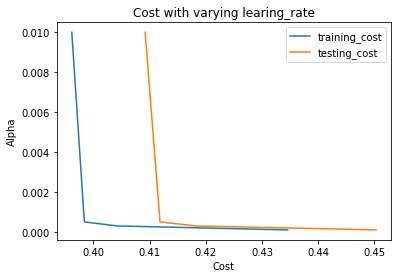

In [91]:
plt.plot(finalCost_train, learning_rate, label='training_cost')
plt.plot(finalCost_test, learning_rate, label='testing_cost')
plt.title('Cost with varying learing_rate')
plt.ylabel('Alpha',)
plt.xlabel('Cost')
plt.legend()
plt.show()

Experiment 3- Part B

In [94]:
# convert into binary classification problem. The target variable should have two categories.
y_LogReg3=sgemm_product['AVERAGE_RUN']
y_LogReg3 = y_LogReg3.apply(lambda x : 0 if x <= average_median else 1)
X_LogReg3 = sgemm_product.drop(['AVERAGE_RUN'],axis=1)

X_LogReg3_sample=pd.DataFrame.sample(X_LogReg3,n=8,random_state=0,axis=1)
X_LogReg3_sample.columns


# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_LogReg3 = StandardScaler()
X_LogReg3_sample = sc_LogReg3.fit_transform(X_LogReg3_sample)
X_LogReg3_sample = pd.DataFrame(X_LogReg3_sample)

#setting the matrixes
ones = np.ones([X_LogReg3.shape[0],1])
X_LogReg3_sample = np.concatenate((ones,X_LogReg3_sample),axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_LogReg3_sample,y_LogReg3,test_size = 0.3,random_state = 0)


C:\Users\mukil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mukil\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [95]:
theta = np.zeros(X_train.shape[1])
initial_cost = compute_cost(X_train, y_train, theta)
print("Initial Cost is: {} \n".format(initial_cost))

#set hyper parameters
learning_rate = [0.001,0.003,0.006,0.1] #learning rate
iters = 5000 #no.of iterations
#threshold = [0.00001,0.000015,0.00002,0.000025]


Initial Cost is: 0.693127180759928 



In [96]:
LogCost_train = []
LogCost_test = []
accuracy2=[]
for alpha in learning_rate:
    (LogCost_history,newtheta) = gradient_descent(X_train, y_train, theta, alpha, iters)
    LogCost_train.append(LogCost_history[-1])
    LogCost_test.append(compute_cost(X_test,y_test,newtheta))
    y_pred = pred_values(newtheta, X_test)
    accuracy2.append(accuracy_score(y_test,y_pred))



Text(0.5, 1.0, 'Accuracy vs. Test set Alpha')

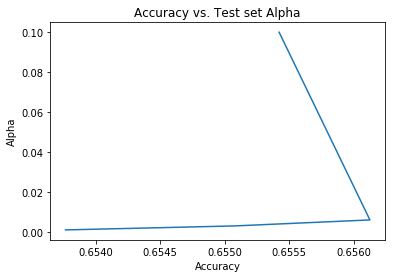

In [97]:
fig , ax = plt.subplots()
ax.plot(accuracy2,learning_rate)
ax.set_xlabel('Accuracy')  
ax.set_ylabel('Alpha')  
ax.set_title('Accuracy vs. Test set Alpha') 

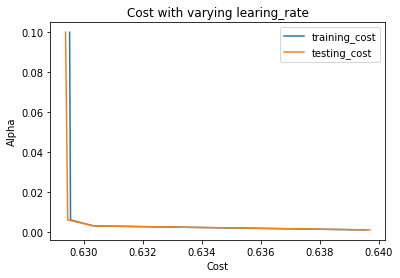

In [98]:
plt.plot(LogCost_train, learning_rate, label='training_cost')
plt.plot(LogCost_test, learning_rate, label='testing_cost')
plt.title('Cost with varying learing_rate')
plt.ylabel('Alpha',)
plt.xlabel('Cost')
plt.legend()
plt.show()

In [99]:
print(LogCost_train)
print(LogCost_test)

[array([0.63956457]), array([0.63032331]), array([0.62954394]), array([0.62951192])]
[0.6396992495692762, 0.6303463174884102, 0.6294482092087811, 0.6293741084194706]


In [100]:
print(newtheta)

[ 0.01026802  0.4144477  -0.1142917  -0.40476768 -0.02145073  0.00645872
 -0.06502059 -0.1063436   0.60630752]


In [101]:
print(accuracy2)

[0.6537665562913907, 0.6550772626931567, 0.6561258278145695, 0.6554221854304636]


# 4. Manual Feature Selection

Experiment 4- Part A

From the correlation matrix, we can see that the MWG,NWG,VWM and VWN are most highly correlated while MDIMC,NDIMC,MDIMA and NDIMB are least correlated with Average Run. Now let us retrain the model using the highlt correlated fields with Average Run.

In [141]:
y_LinReg4=lin_reg1['AVERAGE_RUN']
X_LinReg4 = lin_reg1.drop(['MDIMC','NDIMC','MDIMA','NDIMB','STRM', 'STRN','AVERAGE_RUN'],axis=1)

#setting the matrixes
ones = np.ones([X_LinReg4.shape[0],1])
X_LinReg4 = np.concatenate((ones,X_LinReg4),axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_LinReg4, y_LinReg4, test_size=0.3, random_state=101)


# Initial Coefficients
B = np.zeros(X_train.shape[1])

# compute cost with all Betas as zeroes
finalCost_before_GD = cost_function(X_train,y_train,B)
print(finalCost_before_GD)


0.49465903977303277


In [142]:
#set hyper parameters
learning_rate = [0.0001,0.0003,0.0005,0.01] #learning rate
iters = 5000 #no.of iterations
#threshold = [0.00001,0.000015,0.00002,0.000025]

finalCost_train = []
finalCost_test = []
for alpha in learning_rate:
    newB,cost_history = batch_gradient_descent(X_train,y_train,B,alpha,iters)
    finalCost_train.append(cost_history[-1]) 
    finalCost_test.append(cost_function(X_test,y_test,newB)) 

print(finalCost_train)
print(finalCost_test)
print(learning_rate)

[0.4149413496444895, 0.382797539655963, 0.37854265294537515, 0.37740279861968024]
[0.43037325043290736, 0.39656588698321865, 0.3919376974734885, 0.39073981171618205]
[0.0001, 0.0003, 0.0005, 0.01]


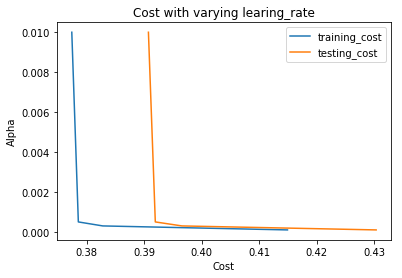

In [143]:
plt.plot(finalCost_train, learning_rate, label='training_cost')
plt.plot(finalCost_test, learning_rate, label='testing_cost')
plt.title('Cost with varying learing_rate')
plt.ylabel('Alpha',)
plt.xlabel('Cost')
plt.legend()
plt.show()

In [144]:
print(newB)

[-0.00187411  0.33487841  0.30637354  0.00555779  0.03034413  0.04422619
  0.03455649  0.05211459  0.06308182]


Part B Logistic REgression

In [145]:
# convert into binary classification problem. The target variable should have two categories.
y_LogReg4=sgemm_product['AVERAGE_RUN']
y_LogReg4 = y_LogReg4.apply(lambda x : 0 if x <= average_median else 1)
X_LogReg4 = sgemm_product.drop(['MDIMC','NDIMC','MDIMA','NDIMB','STRM', 'STRN','AVERAGE_RUN'],axis=1)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_LogReg4 = StandardScaler()
X_LogReg4 = sc_LogReg4.fit_transform(X_LogReg4)
X_LogReg4 = pd.DataFrame(X_LogReg4)

#setting the matrixes
ones = np.ones([X_LogReg4.shape[0],1])
X_LogReg4 = np.concatenate((ones,X_LogReg4),axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_LogReg4,y_LogReg4,test_size = 0.3,random_state = 0)

C:\Users\mukil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mukil\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [146]:
theta = np.zeros(X_train.shape[1])
initial_cost = compute_cost(X_train, y_train, theta)
print("Initial Cost is: {} \n".format(initial_cost))

#set hyper parameters
learning_rate = [0.001,0.003,0.006,0.1] #learning rate
iters = 5000 #no.of iterations
#threshold = [0.00001,0.000015,0.00002,0.000025]


Initial Cost is: 0.693127180759928 



In [147]:
LogCost_train = []
LogCost_test = []
accuracy3=[]
for alpha in learning_rate:
    (LogCost_history,newtheta) = gradient_descent(X_train, y_train, theta, alpha, iters)
    LogCost_train.append(LogCost_history[-1])
    LogCost_test.append(compute_cost(X_test,y_test,newtheta))
    y_pred = pred_values(newtheta, X_test)
    accuracy3.append(accuracy_score(y_test,y_pred))

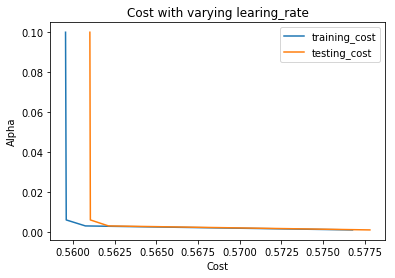

In [150]:
plt.plot(LogCost_train, learning_rate, label='training_cost')
plt.plot(LogCost_test, learning_rate, label='testing_cost')
plt.title('Cost with varying learing_rate')
plt.ylabel('Alpha',)
plt.xlabel('Cost')
plt.legend()
plt.show() 

In [153]:
print(LogCost_train)
print(LogCost_test)

[array([0.57676253]), array([0.56074446]), array([0.55959482]), array([0.55955295])]
[0.5778078222289412, 0.5621286031080266, 0.5610413877245417, 0.5610122366914381]


In [151]:
accuracy3

[0.7199365342163355,
 0.7218405077262693,
 0.7215783664459161,
 0.7200331125827815]